In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passangers-booking-data/AirlineScrappedReview.csv
/kaggle/input/airline-passangers-booking-data/Customer_comment.csv
/kaggle/input/airline-passangers-booking-data/Passanger_booking_data.csv
/kaggle/input/airline-passangers-booking-data/Survey data_Inflight Satisfaction Score.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
import os

# List all files inside the dataset folder
os.listdir('/kaggle/input/airline-passangers-booking-data')


['AirlineScrappedReview.csv',
 'Customer_comment.csv',
 'Passanger_booking_data.csv',
 'Survey data_Inflight Satisfaction Score.csv']

In [11]:
import os

# List all files and folders under your dataset path
base_path = "/kaggle/input/airline-passangers-booking-data"
for root, dirs, files in os.walk(base_path):
    print(f"📁 {root}")
    for file in files:
        print(f"    └── 📄 {file}")


📁 /kaggle/input/airline-passangers-booking-data
    └── 📄 AirlineScrappedReview.csv
    └── 📄 Customer_comment.csv
    └── 📄 Passanger_booking_data.csv
    └── 📄 Survey data_Inflight Satisfaction Score.csv


In [12]:
import pandas as pd

# Load the passenger booking data file
df = pd.read_csv('/kaggle/input/airline-passangers-booking-data/Passanger_booking_data.csv')

# Preview the data
df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


In [14]:
# Customer comments
comments = pd.read_csv('/kaggle/input/airline-passangers-booking-data/Customer_comment.csv')

# Airline reviews
reviews = pd.read_csv('/kaggle/input/airline-passangers-booking-data/AirlineScrappedReview.csv')

# Inflight survey
survey = pd.read_csv('/kaggle/input/airline-passangers-booking-data/Survey data_Inflight Satisfaction Score.csv')


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50002 non-null  int64  
 1   sales_channel          50002 non-null  object 
 2   trip_type              50002 non-null  object 
 3   purchase_lead          50002 non-null  int64  
 4   length_of_stay         50002 non-null  int64  
 5   flight_hour            50002 non-null  int64  
 6   flight_day             50002 non-null  object 
 7   route                  50002 non-null  object 
 8   booking_origin         50002 non-null  object 
 9   wants_extra_baggage    50002 non-null  int64  
 10  wants_preferred_seat   50002 non-null  int64  
 11  wants_in_flight_meals  50002 non-null  int64  
 12  flight_duration        50002 non-null  float64
 13  booking_complete       50002 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [16]:
df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


In [17]:
for col in df.columns:
    print(f"\n{col} → {df[col].unique()[:10]}")



num_passengers → [1 2 3 4 6 5 7 9 8]

sales_channel → ['Internet' 'Mobile']

trip_type → ['RoundTrip' 'CircleTrip' 'OneWay']

purchase_lead → [ 21 262 112 243  96  68   3 201 238  80]

length_of_stay → [12 19 20 22 31 48 33 30 25 43]

flight_hour → [ 6  7  3 17  4 15 20 14 12  2]

flight_day → ['Tue' 'Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Fri']

route → ['AKLHGH' 'AKLDEL' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG']

booking_origin → ['Australia' 'New Zealand' 'India' 'United Kingdom' 'China' 'South Korea'
 'Canada' 'Japan' 'Malaysia' 'Singapore']

wants_extra_baggage → [0 1]

wants_preferred_seat → [0 1]

wants_in_flight_meals → [0 1]

flight_duration → [7.21 5.52 5.07 7.57 6.62 7.   4.75 8.83 7.42 6.42]

booking_complete → [1 0]


In [18]:
def simulate_funnel(row):
    if row['booking_complete'] == 1:
        return '5_Booking Complete'
    elif row['wants_in_flight_meals'] or row['wants_extra_baggage'] or row['wants_preferred_seat']:
        return '4_Payment Page'
    elif row['flight_duration'] > 0:
        return '3_Flight Selected'
    elif row['purchase_lead'] > 0:
        return '2_Flight Search'
    else:
        return '1_Homepage'

df['Funnel_Stage'] = df.apply(simulate_funnel, axis=1)
df['Funnel_Stage'].value_counts().sort_index()


Funnel_Stage
3_Flight Selected      9339
4_Payment Page        33184
5_Booking Complete     7479
Name: count, dtype: int64

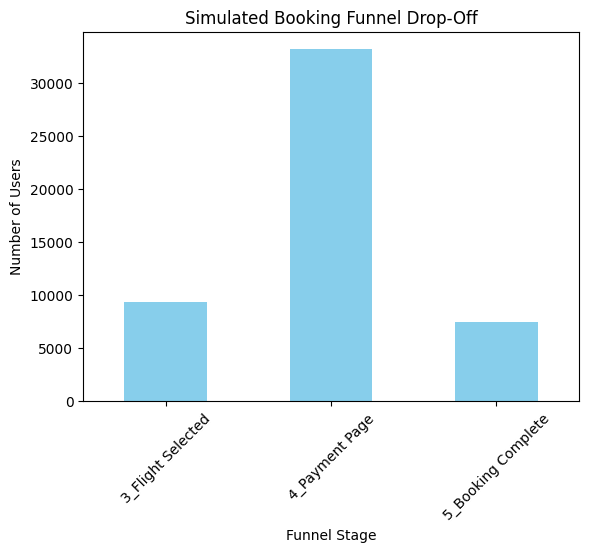

In [19]:
import matplotlib.pyplot as plt

funnel_counts = df['Funnel_Stage'].value_counts().sort_index()
funnel_counts.plot(kind='bar', color='skyblue')
plt.title('Simulated Booking Funnel Drop-Off')
plt.xlabel('Funnel Stage')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()


In [20]:
conversion_rate = df['booking_complete'].mean() * 100
print(f"Booking Conversion Rate: {conversion_rate:.2f}%")


Booking Conversion Rate: 14.96%


In [21]:
df['Bounce'] = df.apply(lambda row: 1 if row['purchase_lead'] < 2 and row['booking_complete'] == 0 else 0, axis=1)
bounce_rate = df['Bounce'].mean() * 100
print(f"Simulated Bounce Rate: {bounce_rate:.2f}%")


Simulated Bounce Rate: 1.82%


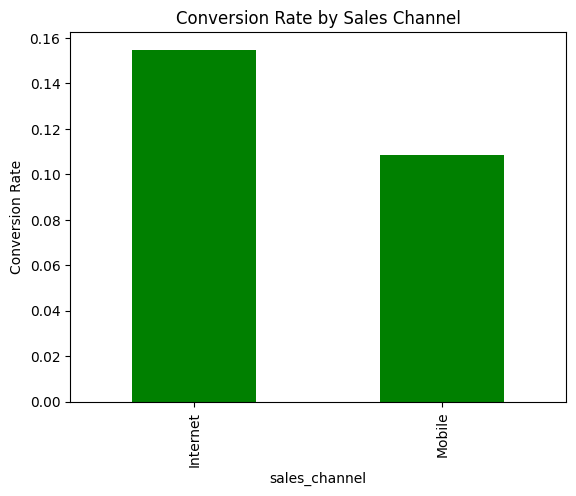

In [22]:
df.groupby('sales_channel')['booking_complete'].mean().plot(kind='bar', color='green')
plt.title('Conversion Rate by Sales Channel')
plt.ylabel('Conversion Rate')
plt.show()


**A/B TESTING STARTS**

**CREATING SIMULATED A/B GROUPS**

In [23]:
import numpy as np

# Create a new column with random A/B assignment
np.random.seed(42)  # So result is consistent every run
df['AB_Group'] = np.random.choice(['A', 'B'], size=len(df))


In [24]:
# Grouped conversion rates
ab_conversion = df.groupby('AB_Group')['booking_complete'].mean() * 100
print("Conversion Rates:\n", ab_conversion)


Conversion Rates:
 AB_Group
A    15.104208
B    14.810066
Name: booking_complete, dtype: float64


**STASTICAL TEST (A/B TEST)**

In [28]:
import scipy.stats 



In [31]:
from statsmodels.stats.proportion import proportions_ztest


**A/B TEST CODE**

In [33]:
from statsmodels.stats.proportion import proportions_ztest

# Group by A/B
conversions = df.groupby('AB_Group')['booking_complete'].sum()
visitors = df.groupby('AB_Group')['booking_complete'].count()

# Run Z-test
z_stat, pval = proportions_ztest(count=conversions, nobs=visitors)
print(f"Z-Stat: {z_stat:.2f}, P-Value: {pval:.4f}")


Z-Stat: 0.92, P-Value: 0.3565


In [36]:
from statsmodels.stats.proportion import proportions_ztest
z_stat, pval = proportions_ztest(count=conversions, nobs=visitors)


In [37]:
# Save the cleaned/modified DataFrame to a CSV file
df.to_csv('Final_Airline_Booking_Data.csv', index=False)


**VISUALIZATIONS**

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
sns.set(style="whitegrid")


**FUNNEL DROP OFF CHART**

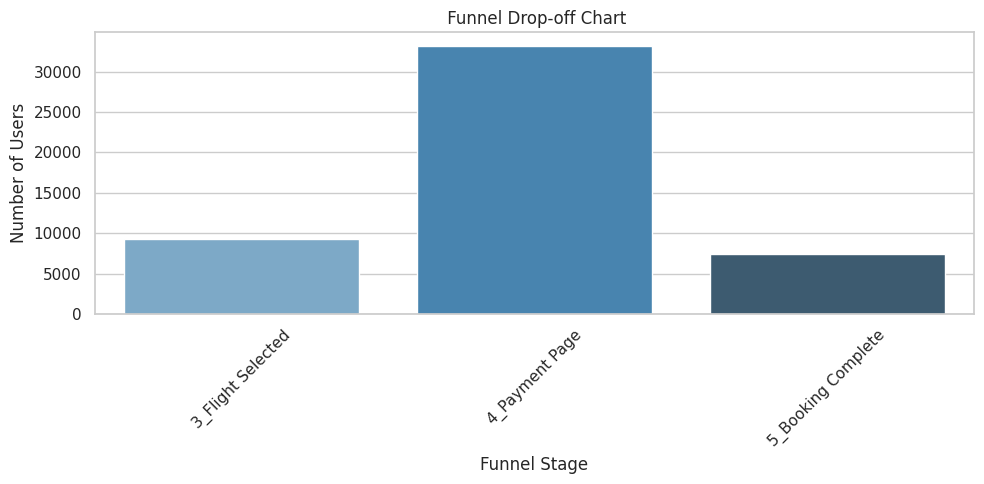

In [42]:
funnel_counts = df['Funnel_Stage'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=funnel_counts.index, y=funnel_counts.values, palette='Blues_d')
plt.title(' Funnel Drop-off Chart')
plt.xlabel('Funnel Stage')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Conversion by Sales Channel**

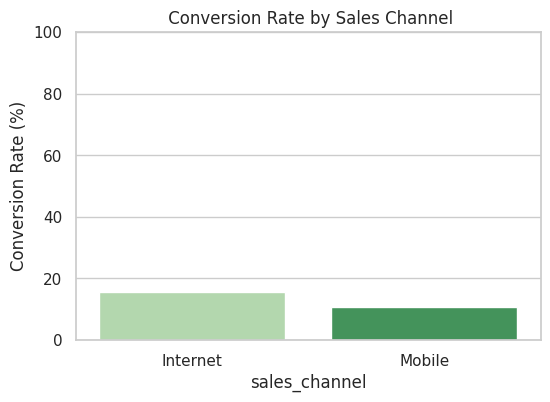

In [43]:
conversion_by_channel = df.groupby('sales_channel')['booking_complete'].mean() * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=conversion_by_channel.index, y=conversion_by_channel.values, palette='Greens')
plt.title(' Conversion Rate by Sales Channel')
plt.ylabel('Conversion Rate (%)')
plt.ylim(0, 100)
plt.show()


**BOUNCE RATE BY SALES CHANNEL**

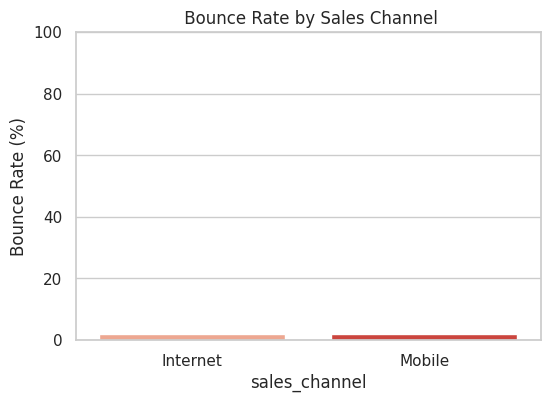

In [45]:
bounce_by_channel = df.groupby('sales_channel')['Bounce'].mean() * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=bounce_by_channel.index, y=bounce_by_channel.values, palette='Reds')
plt.title(' Bounce Rate by Sales Channel')
plt.ylabel('Bounce Rate (%)')
plt.ylim(0, 100)
plt.show()


**CONVERTION BY BOOKING ORIGINS(TOP 10 COUNTRIES)**

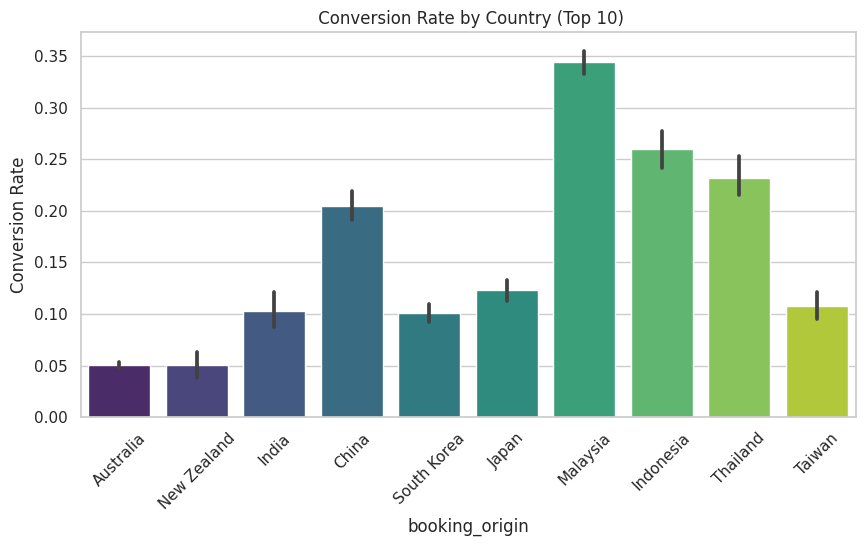

In [46]:
top_countries = df['booking_origin'].value_counts().head(10).index
df_top = df[df['booking_origin'].isin(top_countries)]

plt.figure(figsize=(10, 5))
sns.barplot(
    data=df_top, 
    x='booking_origin', 
    y='booking_complete', 
    estimator=np.mean,
    palette='viridis'
)
plt.title(' Conversion Rate by Country (Top 10)')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()


**BOOKING COMPLETE BY TRIP BY TRIP**

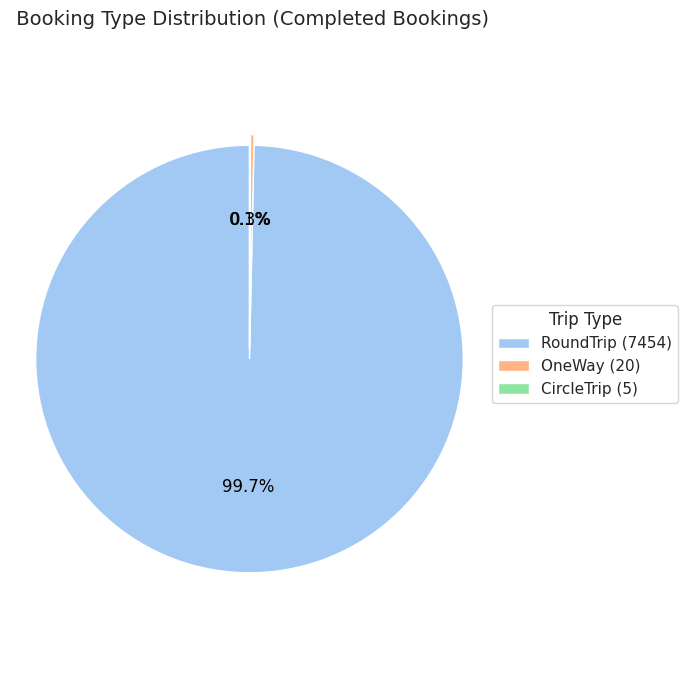

In [52]:
import matplotlib.pyplot as plt

# Data: Completed bookings by trip type
trip_conversion = df[df['booking_complete'] == 1]['trip_type'].value_counts()

# Define explode to push out small slices for visibility
explode = [0.05 if val != trip_conversion.max() else 0 for val in trip_conversion]

# Define colors
colors = sns.color_palette('pastel')[0:len(trip_conversion)]

# Plot
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    trip_conversion,
    labels=None,  # Remove labels from slices
    autopct='%1.1f%%',
    explode=explode,
    startangle=90,
    colors=colors,
    textprops=dict(color="black", fontsize=12)
)

# Add legend outside
plt.legend(
    labels=[f"{label} ({count})" for label, count in zip(trip_conversion.index, trip_conversion)],
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    title="Trip Type"
)

# Title
plt.title(' Booking Type Distribution (Completed Bookings)', fontsize=14)
plt.axis('equal')  # Ensure pie is a circle
plt.tight_layout()
plt.show()


In [54]:
# Filter only completed bookings (if not already done)
df_completed = df[df['booking_complete'] == 1]

# Save to CSV (without the index column)
df_completed.to_csv('completed_bookings.csv', index=False)
